# Introductory applied machine learning (INFR10069)

# Assignment 1: Data analysis and visualisation

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

<font color='red'>95/100</font>

## Mechanics

Fill out this notebook, save it, and **submit it electronically as described below.**

Place your notebook in a directory called `iamlans` and submit this directory using the submit command on a DICE machine:

`submit iaml 1 iamlans`

Please note the importance of the number. **This should changed with each assignment!** Also note that submitting again will *overwrite* your previous submission. You can check the status of your submissions with the `show_submissions` command.

**Distance Learners:** To copy your work up to DICE (such that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files up using `student.ssh.inf.ed.ac.uk`, then ssh in to submit, e.g. (in a unix terminal):
```
assignment_number=1
local_scp_folder=iamlans
UUN=s0816700
server_address=student.ssh.inf.ed.ac.uk
server_scp_folder=Downloads
scp -r ${local_scp_folder} ${UUN}@${server_address}:${server_scp_folder}
# rsync -rl ${local_scp_folder} ${UUN}@${server_address}:${server_scp_folder}
ssh ${UUN}@${server_address}
cd Downloads
submit iaml ${assignment_number} iamlans
```

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

## Important Instructions

1. You *MUST* have your environment set up as in the [README](https://github.com/JamesOwers/iaml2017) and you *must activate this environment before running this notebook*:
```
source activate iaml
cd iaml_2017
jupyter notebook
# Navigate to this file
```

1. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

1. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

1. **IMPORTANT:** Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [2]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

## Description of the dataset

This assignment is based on the 20 Newsgroups Dataset. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

There are three versions of the 20 Newsgroups Dataset. In this assignment we will use the `bydate` matlab version in which documents are sorted by date into training (60%) and test (40%) sets, newsgroup-identifying headers are dropped and duplicates are removed. This collection comprises roughly 61,000 different words, which results in a bag-of-words representation with frequency counts. More specifically, each document is represented by a 61,000 dimensional vector that contains the counts for each of the 61,000 different words present in the respective document. 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related. Additionally, we computed the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) of each word with the class attribute and selected the 520 words out of 61,000 that had highest mutual information. Therefore, our dataset is a $N \times 520$ dimensional matrix, where $N$ is the number of documents. For very sophisticated technical reasons 1 was added to all the word counts in part A. The resulting representation is much more compact and can be used directly to perform our experiments in Python.

## 1. Exploration of the dataset [40%]

Your first task is to get a feel for the data that you will be dealing with in the rest of the assignment.

### ========== Question 1.1 --- [5 marks] ==========
Load the datasets `train_20news_partA.csv` and `train_20news_partB.csv` into two separate pandas DataFrames.

<font color='red'>5/5</font>

In [3]:
# Load data set for train_20news_partA.csv and call it trainA 
data_path = os.path.join(os.getcwd(), 'datasets', 'train_20news_partA.csv')
trainA = pd.read_csv(data_path, delimiter = ',')

# Load dataset for train_20news_partB.csv and call it trainB
data_path = os.path.join(os.getcwd(), 'datasets', 'train_20news_partB.csv')
trainB = pd.read_csv(data_path, delimiter = ',')

### ========== Question 1.2 --- [3 marks] ==========
Display basic information for dataset A such as number of columns, type, and memory usage (*hint: pandas dataframes have a built in method for this*) 

<font color='red'>3/3 A bit verbose for basic information</font>

In [4]:
trainA.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 0 to 2256
Data columns (total 521 columns):
w1_aaa               int64
w2_pins              int64
w3_kmr               int64
w4_notion            int64
w5_queens            int64
w6_dwyer             int64
w7_defenseman        int64
w8_gld               int64
w9_tocchet           int64
w10_home             int64
w11_buying           int64
w12_internet         int64
w13_slots            int64
w14_compatible       int64
w15_transfer         int64
w16_baltimore        int64
w17_mean             int64
w18_person           int64
w19_performance      int64
w20_support          int64
w21_tor              int64
w22_gm               int64
w23_mouse            int64
w24_base             int64
w25_population       int64
w26_bob              int64
w27_set              int64
w28_it               int64
w29_earth            int64
w30_faith            int64
w31_steve            int64
w32_caps             int64
w33_printer          int64
w

### ========== Question 1.3 --- [3 marks] ==========
How many data points and how many attributes are there in the dataset that we can use to model the target variable `class`?

<font color='red'>1/3 There are 520 attributes – the last one is the class</font>

There are 2129 data points (number of rows/number of documents) and 521 attributes (number of columns/number of different words we're collecting frequencies of). 

### ========== Question 1.4 --- [3 marks] ==========
Use a Pandas method to display the summary statistics for the `news_A` DataFrame.

<font color='red'>3/3</font>

In [5]:
trainA.describe()

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.00000,2129.000000,2129.000000,2129.000000,2129.000000,...,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000
mean,5.128229,6.097698,6.120244,5.551902,5.521841,6.12776,5.633161,6.090653,5.970409,5.624706,...,9.666510,9.217473,9.061531,9.398309,9.175200,9.708783,8.807891,9.719587,9.307656,3.092532
std,38.292577,46.190953,46.656022,40.953913,40.978098,45.96434,41.146918,45.762060,44.266628,40.769105,...,45.844064,43.948910,40.969185,43.833064,42.403283,47.294120,39.341038,46.185082,45.059367,1.395948
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,4.000000
max,572.000000,583.000000,579.000000,580.000000,591.000000,600.00000,546.000000,591.000000,578.000000,578.000000,...,590.000000,587.000000,577.000000,598.000000,568.000000,599.000000,585.000000,600.000000,597.000000,5.000000


### ========== Question 1.5 --- [3 marks] ==========
Display the first 7 instances of dataset A.

<font color='red'>3/3</font>

In [6]:
trainA.head(7)

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
0,1,1,1,1,1,1,1,1,1,1,...,1,5,3,6,8,4,6,4,8,4
1,1,1,1,1,1,1,1,1,1,1,...,2,3,6,8,3,4,5,6,5,4
2,1,1,1,1,1,1,1,1,1,2,...,4,2,6,5,2,5,5,7,8,2
3,1,1,1,1,1,1,1,1,1,1,...,6,3,6,1,1,8,1,8,4,3
4,1,1,1,1,1,1,1,1,1,1,...,6,1,7,8,6,3,1,8,4,3
5,1,1,1,1,1,1,1,1,1,1,...,7,5,4,5,5,7,7,7,2,2
6,1,1,1,1,2,1,1,1,1,1,...,3,6,8,8,3,5,2,1,2,1


### ========== Question 1.6 --- [5 marks] ==========
Display the names of the first 100 attributes in dataset A. 

You might observe that each attribute consists of two parts:
1. `w<x>_` (where x is an index corresponding to each word)
2. the actual name of the word

<font color='red'>5/5</font>

In [7]:
columnLabels = list(trainA)
columnLabels[:100]

['w1_aaa',
 'w2_pins',
 'w3_kmr',
 'w4_notion',
 'w5_queens',
 'w6_dwyer',
 'w7_defenseman',
 'w8_gld',
 'w9_tocchet',
 'w10_home',
 'w11_buying',
 'w12_internet',
 'w13_slots',
 'w14_compatible',
 'w15_transfer',
 'w16_baltimore',
 'w17_mean',
 'w18_person',
 'w19_performance',
 'w20_support',
 'w21_tor',
 'w22_gm',
 'w23_mouse',
 'w24_base',
 'w25_population',
 'w26_bob',
 'w27_set',
 'w28_it',
 'w29_earth',
 'w30_faith',
 'w31_steve',
 'w32_caps',
 'w33_printer',
 'w34_east',
 'w35_cable',
 'w36_adapter',
 'w37_mss',
 'w38_catcher',
 'w39_bullpen',
 'w40_obp',
 'w41_innocent',
 'w42_european',
 'w43_angeles',
 'w44_settings',
 'w45_words',
 'w46_rit',
 'w47_shots',
 'w48_ports',
 'w49_vga',
 'w50_coverage',
 'w51_jumpers',
 'w52_bases',
 'w53_sea',
 'w54_pts',
 'w55_behavior',
 'w56_domi',
 'w57_sabres',
 'w58_yzerman',
 'w59_messier',
 'w60_goalies',
 'w61_hawks',
 'w62_our',
 'w63_sx',
 'w64_view',
 'w65_hitters',
 'w66_richard',
 'w67_point',
 'w68_nyi',
 'w69_mvp',
 'w70_kill',


### ========== Question 1.7 --- [4 marks] ==========
Familiarise yourself with the [`stripplot`](https://seaborn.github.io/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot) function in `seaborn`. Pick one attribute of your choice (except `class`) and display a stripplot for that attribute for dataset A. Demonstrate the distribution of the data separately for each class (by making appropriate use of the `x` argument in `stripplot`). Set the `jitter` argument to `True` and the `alpha` argument to an appropriate value (to add transparency). When the jitter parameter is enabled a small amount of noise is added to the data so that there is less overlap and the distribution is easier to visualise.

<font color='red'>4/4</font>

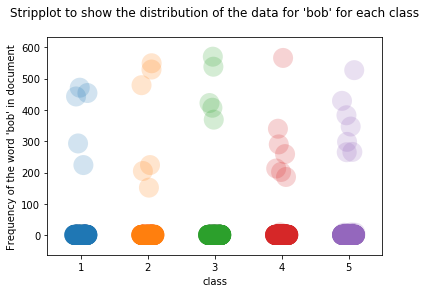

In [8]:
#Plot stripplot of 'bob'. Set size to 20 and transparency to 0.2 so that we can see easily where the
#higher frequencies of the word is (this will be the more opaque areas)
ax = sns.stripplot(x="class",y="w26_bob", data=trainA, jitter=True, size=20, alpha=0.2)
ax.set_ylabel("Frequency of the word 'bob' in document")
plt.title("Stripplot to show the distribution of the data for 'bob' for each class\n")
plt.show()

### ========== Question 1.8 --- [4 marks] ==========
The stripplot illustrates the distribution of a single attribute. We can also visualise the joint distribution of two variables by using a scatter plot. Again, we want to add a bit of noise into the data so that is easier to see which parts of the space (2-dimensional in our case) have larger probability densities. 

For this, you will be using the function `scatter_jitter` provided below. This function takes as input two numpy arrays containing the features of interest. Pick two attributes of your choice from dataset A and use the provided function to plot their joint distribution. You can play around with the amount of noise added by tweaking the `jitter` parameter. Alternatively, you can just use its default value which is set to 0.2.

<font color='red'>4/4</font>

In [9]:
def scatter_jitter(arr1, arr2, jitter=0.2):
    """ Plots a joint scatter plot of two arrays by adding small noise to each example. 
    Noise is proportional to variance in each dimension. """
    arr1 = np.asarray(arr1)
    arr2 = np.asarray(arr2)
    arr1 = arr1 + jitter*arr1.std(axis=0)*np.random.standard_normal(arr1.shape)
    arr2 = arr2 + jitter*arr2.std(axis=0)*np.random.standard_normal(arr2.shape)
    plt.scatter(arr1, arr2, marker=4)

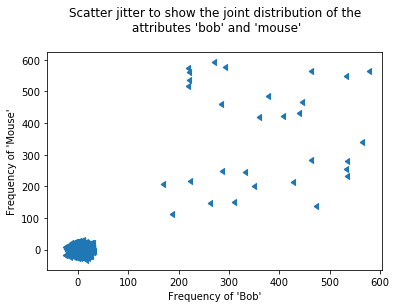

In [14]:
plt.title("Scatter jitter to show the joint distribution of the\n attributes 'bob' and 'mouse'\n")
plt.xlabel("Frequency of 'Bob'")
plt.ylabel("Frequency of 'Mouse'")
scatter_jitter(trainA["w26_bob"], trainA["w23_mouse"], jitter=0.2)

### ========== Question 1.9 --- [7 marks] ==========
From the strip and scatter plots above you might observe that there is something peculiar about the data. Indeed most attributes take very small values (usually in the range 1-10) but there are some data points (i.e. rows) in the dataset where the attributes take very large values. These data points are called [outliers](https://en.wikipedia.org/wiki/Outlier).

You might think that the presence of outliers in the dataset has been a resut of noise contamination (you wouldn't expect the same word to appear 600 times within an e-mail, would you?). Your job now is to create a new dataset from dataset A (name it `news_A_clean`) and remove the outliers. Create some metric to find the outliers and check that your metric is reasonable. Be careful not to alter the original `news_A`...we may require it in its dirty format later...

<font color='red'>7/7</font>

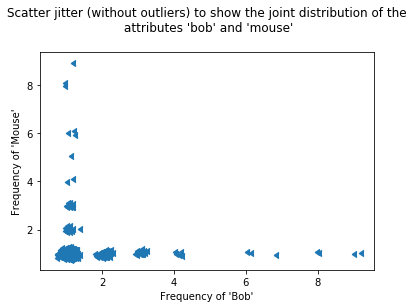

In [11]:
#Creating a copy of trainA and calling it news_clean_A
news_clean_A=trainA.copy(deep=True)

#Have a look at percentiles to make sure the value chosen to detect outliers is actually reasonable 
#print(np.percentile(trainA, 99.7)) # = 494

# Only keep the values in news_clean_A which is within under the 99.85th percentile of the data, and above 
# 0.15th percentile, which would be the 99.7% of the data which lies within 3 standard deviations of the mean 
# rest converted to NaN
news_clean_A=news_clean_A[news_clean_A<=np.percentile(trainA, 99.85)]
news_clean_A=news_clean_A[news_clean_A>=np.percentile(trainA, 0.15)]

#drop all rows with any NaN values
news_clean_A=news_clean_A.dropna(axis=0)

#Plot the scatter jitter from question 8 to see if dropping the outliers was reasonable and 
#we get a graph with more readable axes and data without the very high outliers
scatter_jitter(news_clean_A["w26_bob"], news_clean_A["w23_mouse"], jitter=0.2)
plt.title("Scatter jitter (without outliers) to show the joint distribution of the\n attributes 'bob' and 'mouse'\n")
plt.xlabel("Frequency of 'Bob'")
plt.ylabel("Frequency of 'Mouse'")
plt.show()

### ========== Question 1.10 --- [3 marks] ==========
Write code to return the number of data points in the clean dataset, and the number of documents that have been excluded as outliers

<font color='red'>3/3</font>

In [13]:
#Having a look at the number of rows and columns in news_clean_A to see if it looks reasonable
#print(news_clean_A.shape)

print("\nThere are " + str(news_clean_A.shape[0]) + " data points in the clean dataset")

print("\nWe have excluded " + str(trainA.shape[0]-news_clean_A.shape[0]) + " documents because they contained outliers")



There are 2099 data points in the clean dataset

We have excluded 30 documents because they contained outliers


## 2. Naive Bayes classification [60%]
Now we want to fit a Gaussian Naive Bayes model to the cleaned dataset A. You might want first to familiarise yourself with the [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) class in `Sklearn`.

### ========== Question 2.1 --- [4 marks] ==========

By using the `scatter_jitter` function provided above, display a scatter plot of the features `w281_ico` and `w273_tek` for the cleaned dataset A. Set the jitter value to something small (e.g. 0.1). Label axes appropriately.

<font color='red'>4/4</font>

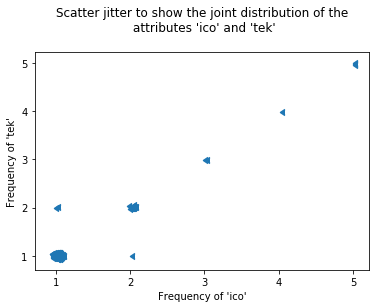

In [14]:
scatter_jitter(news_clean_A["w281_ico"], news_clean_A["w273_tek"], jitter=0.1)
plt.title("Scatter jitter to show the joint distribution of the\n attributes 'ico' and 'tek'\n")
plt.xlabel("Frequency of 'ico'")
plt.ylabel("Frequency of 'tek'")
plt.show()

### ========== Question 2.2 --- [6 marks] ==========
What do you observe? 

How does that relate to the Naive Bayes assumption? 

What would be the main issue we would have to face if we didn't make this assumption?

<font color='red'>6/6</font>

I see that there is a positive correlation between the frequency of the words "ico" and "tek". This means that they have covariance and are not independent. However, when using Naive Bayes, we assume that all our x values are independent given the class. The main issue we would face if we didn't make this assumption woud be that our covariance matrix would be huge and calculating the probabilities of each class would be computationally complex and slow.

### ========== Question 2.3 --- [5 marks] ==========
Fit a Gaussian Naive Bayes model to the cleaned dataset A. Your input features should be all the attributes in the dataset except the `class` attribute which will be your target. Display the classification accuracy on the training dataset.

<font color='red'>5/5</font>

In [15]:
#creating a copy of news_clean_A so that we can drop the 'class' attribute
news_clean_AA=news_clean_A.copy(deep=True)
news_clean_AA.drop("class", axis=1, inplace=True)
cleanAClass = news_clean_A["class"]

#create a Gaussian distribution
gnb_clean = GaussianNB()
#fit the Gaussian to the clean dataset for A
gnb_clean.fit(news_clean_AA, cleanAClass)
#the accuracy score for the fitted Gaussian distribution
gnb_clean.score(news_clean_AA, cleanAClass)

0.87803716055264414

### ========== Question 2.4 --- [5 marks] ==========
Plot the (normalised) confusion matrix for the training data. Label axes appropriately.

<font color='red'>5/5</font>

In [16]:
#Predicting the class output for the cleaned dataset using the Gaussian fit 
classPredictA = gnb_clean.predict(news_clean_AA)

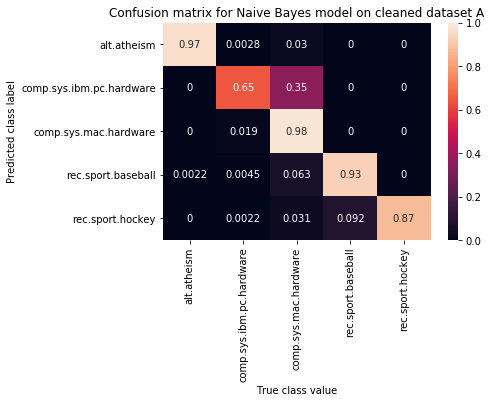

In [17]:
#Creating and plotting the confusion matrix
cm= confusion_matrix(cleanAClass, classPredictA)
cmNorm = cm/ cm.sum(axis=1)[:,np.newaxis]

def plot_confusion_matrix(confusionMatrix, classes=None, title='Confusion matrix'):
    #sns.heatmap(confusionMatrix, vmin=0., vmax=1., annot=True)
    sns.heatmap(confusionMatrix, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    plt.title(title)
    plt.xlabel('True class value')
    plt.ylabel('Predicted class label')
    
plot_confusion_matrix(cmNorm, classes=["alt.atheism","comp.sys.ibm.pc.hardware","comp.sys.mac.hardware",
                "rec.sport.baseball","rec.sport.hockey"], title='Confusion matrix for Naive Bayes model on cleaned dataset A')

### ========== Question 2.5 --- [3 marks] ==========

Comment on the confusion matrix from the previous question. Does it look like what you would have expected? Explain.

<font color='red'>3/3</font>

The diagonal from the top left to the bottom right are the proportion of the values that our predictor predicted true correctly. 
Out of the five classes, the predictor was the least good at predicting the true values of class comp.sys.ibm.pc.hardware correctly. Perhaps this is because we are told that this class and class comp.sys.mac.hardware are closely related, so it is misttaking words that are really in the former class as words in the latter class (as we can see from the value 0.35 in the confusion matrix which is rather high for a non-true poisitive value). 
We earlier excluded outliers, so we would expect our predictor to have a fairly high accuracy of getting true values correctly predicted. The top left to bottom right diagonal squares are all relatively high values which is what we would expect of a decent predictor. 

### ========== Question 2.6 --- [5 marks] ==========
Fit a Gaussian Naive Bayes model to the original dataset A (including the outliers). Display the classification accuracy on the training dataset.

<font color='red'>5/5</font>

In [18]:
#Creating a copy of data set A so we can remove the class attribute
trainAA=trainA.copy(deep=True)
trainAA.drop("class", axis=1, inplace=True)

#Creating a Gaussian distribution
gnb = GaussianNB()
#Fitting the Gaussian distribution to the dataset (including outliers)
gnb.fit(trainAA, trainA["class"])
gnb.score(trainAA, trainA["class"])

0.20526068576796619

### ========== Question 2.7 --- [4 marks] ==========
Comment on the above results (Questions 2.3 & 2.6). In particular explain why you think that cleaning the data helps in this case.

<font color='red'>3/4</font>

With the original training dataset, the classification accuracy is around 20.5% and with the cleaned dataset, it is around 87.9%. A Gaussian distribution has around 2/3 of the data within one standard deviation of the mean, and 98% within two standard deviations, so if we don't clean the dataset, then we will generate a vastly different model because a lot of the should-be-outliers will be included in creating this model as the standard deviation for the dataset will be a lot higher than for the cleaned dataset. Cleaning the dataset helps with accuracy because the model will be based on the actual real data, rather than trying to base it on real data AND outliers, which don't represent the majority of the data. 

### ========== Question 2.8 --- [5 marks] ==========

Now we want to evaluate the generalisation of the classifier on new (i.e. unseen data). Use the classifier you trained in Question 2.5 (i.e. on the cleaned dataset) and test its performance on dataset `train_20news_partB`. 

Display the (normalized) confusion matrix and the classification accuracy on the Dataset B.

<font color='red'>5/5</font>

In [19]:
#Making a copy of dataset B so we can remove the 'class' attribute
trainBB=trainB.copy(deep=True)
trainBB.drop("class", axis=1, inplace=True)

#printing the accuracy score for how well the Gaussian distribution fitted on A works on 
#dataset B
print(gnb_clean.score(trainBB, trainB["class"]))

0.8203125


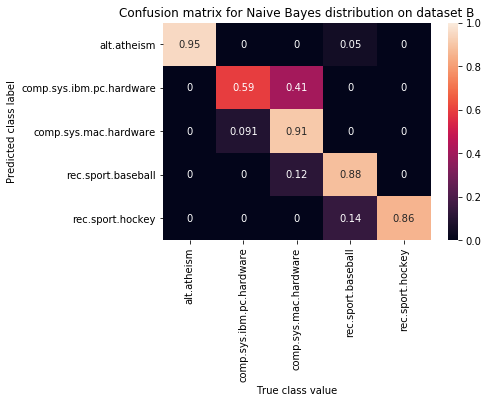

In [20]:
#Predicting the classes for dataset B using the Gaussian fitted on dataset A
classPredictB = gnb_clean.predict(trainBB)
cleanBClass = trainB["class"]

#Creating a plotting the normalised confusion matrix for the Gaussian on dataset B
cmB= confusion_matrix(cleanBClass, classPredictB)
#cmBNorm = cmB/ np.sum(cmB, axis=1)
cmBNorm=cmB/cmB.sum(axis=1)[:,np.newaxis]
plot_confusion_matrix(cmBNorm,  classes=["alt.atheism","comp.sys.ibm.pc.hardware","comp.sys.mac.hardware",
                "rec.sport.baseball","rec.sport.hockey"],title='Confusion matrix for Naive Bayes distribution on dataset B')

### ========== Question 2.9 --- [4 marks] ==========

Comment on the results from the previous question. Do you think this is an acceptable level of performance? Which are the easiest and most difficult classes to predict correctly? 

<font color='red'>4/4</font>

The matrix looks fairly similar to the previous one done on the training data, although this one has overall slightly lower accuracy for the correctly predicted true values (the coloured diagonal). This is what we would expect when we test on unseen data and is an acceptable level of performance, although the predictions for the comp.sys.ibm.pc.hardware class isn't that great. The alt.altheism class is the easiest to predict. We can see this as its correctly predicted true values score is 0.95, which is the highest. On the other hand, comp.sis.ibm.pc.hardware class is the most difficult to predict correctly, as its score for the value mentioned in the previous sentence is 0.59, which is the lowest. 

### ========== Question 2.10 --- [4 marks] ==========
What is a reasonable baseline against which to compare the classiffication performance? *Hint: What is the simplest classiffier you can think of and what would its performance be on this dataset?* 

<font color='red'>4/4</font>

A reasonable baseline is to always set the prediction to be the most common class, i.e. the modal class, based on training set A. This is the simplest classifier I can think of. There are 5 classes. Supposing there were roughly around the same number of data points in each class, then the performance on this dataset would be just above 20% for the training set A, and probably slightly lower but still around 20% for the testing set B. This is quite a poor classifier. 

### ========== Question 2.11 --- [4 marks] ==========

Estimate the baseline performance.

<font color='red'>4/4</font>

In [21]:
#Finding the most common number in the class attribute of dataset A
modeTrainA=stats.mode(trainA["class"], axis=None)[0] 
print(modeTrainA)

#Creating an array which is the same size as the "class" attribute in dataset B, and where
#all the entries are the value of the mode above (which turns out to be 4 here)
predictFour = np.full(fill_value=modeTrainA, shape=trainB["class"].shape)

[4]


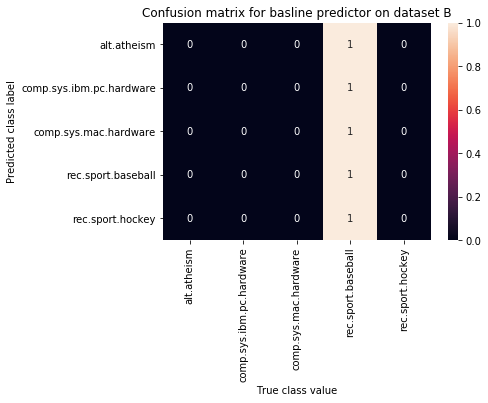

In [22]:
#Creating a plotting the normalised confusion matrix for the baseline predictor on dataset B so that I can
#confirm and visualise the predictor always outputting class rec.sport.baseball
matrix4s= confusion_matrix(cleanBClass, predictFour)
matrix4sNorm=matrix4s/matrix4s.sum(axis=1)[:,np.newaxis]
plot_confusion_matrix(matrix4sNorm,  classes=["alt.atheism","comp.sys.ibm.pc.hardware","comp.sys.mac.hardware",
     "rec.sport.baseball","rec.sport.hockey"],title='Confusion matrix for basline predictor on dataset B')

In [23]:
#the accuracy of using this baseline with dataset B
accuracyMode = accuracy_score(trainB["class"], predictFour)
print("The accuracy of the baseline classifier is " + str(accuracyMode))

The accuracy of the baseline classifier is 0.203125


### ========== Question 2.12 --- [3 marks] ==========

Execute the cell below to get the prediction on the test dataset by using a different classifier which we will be introducing in this class later on. By using this prediction provided below (`rf_prediction`) plot the confusion matrix and display the classification accuracy on the test dataset. *Important: Make sure the test dataset is loaded in a DataFrame called `news_B` otherwise execution will return an error. In that case replace the DataFrame name in the third line.*

<font color='red'>3/3</font>

0.875


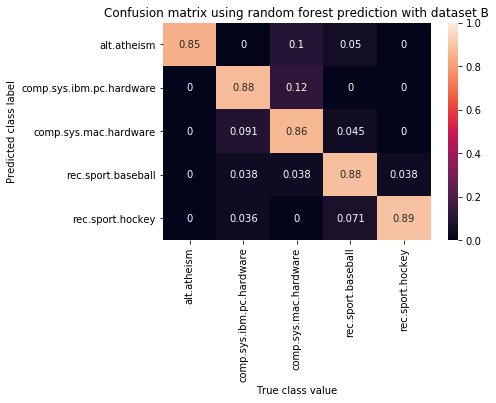

In [24]:
rf = RandomForestClassifier(n_estimators = 50).fit(X=news_clean_A.drop("class", axis=1), y=news_clean_A["class"])
X_ts = trainB.drop('class', axis=1)
rf_prediction = rf.predict(X=X_ts)

print(accuracy_score(trainB["class"], rf_prediction))

#Creating and plotting the confusion matrix
cmRF= confusion_matrix(trainB["class"], rf_prediction)
cmRFNorm = cmRF/ cmRF.sum(axis=1)[:,np.newaxis]
plot_confusion_matrix(cmRFNorm,  classes=["alt.atheism","comp.sys.ibm.pc.hardware","comp.sys.mac.hardware",
                "rec.sport.baseball","rec.sport.hockey"],title='Confusion matrix using random forest prediction with dataset B')


### ========== Question 2.13 --- [8 marks] ==========

Which classifier (Naive Bayes or Random Forest) would you trust if you had to choose? What are the reasons you believe the Gaussian Naive Bayes classifier does not perform so well in this particular problem? You are not expected to justify the performance level achieved by the Random Forest classifier. Feel free to use code and plots to illustrate your points.

<font color='red'>6/8</font>

The accuracy of the Naive Bayes classifier on the test set was 0.8203125 (calculated in 2.8) and the accuracy of the Random Forest classifier on the test set was 0.8671875 (calculated in 2.12). The accuracy for the Random Forest was higher, so I would be more inclined to trust Random Forest over Naive Bayes for this problem. Also, looking at the confusion matrices, I can see that the Naive Bayes Classifier does have some higher true positive values, but its true positive accuracy rate varies between classes, with the lowest being 0.59 and the highest 0.95. The Random Forest classifier's true positives are more consistently high (above 0.8), so I think this is a more reliable classifier and would again trust it more. 

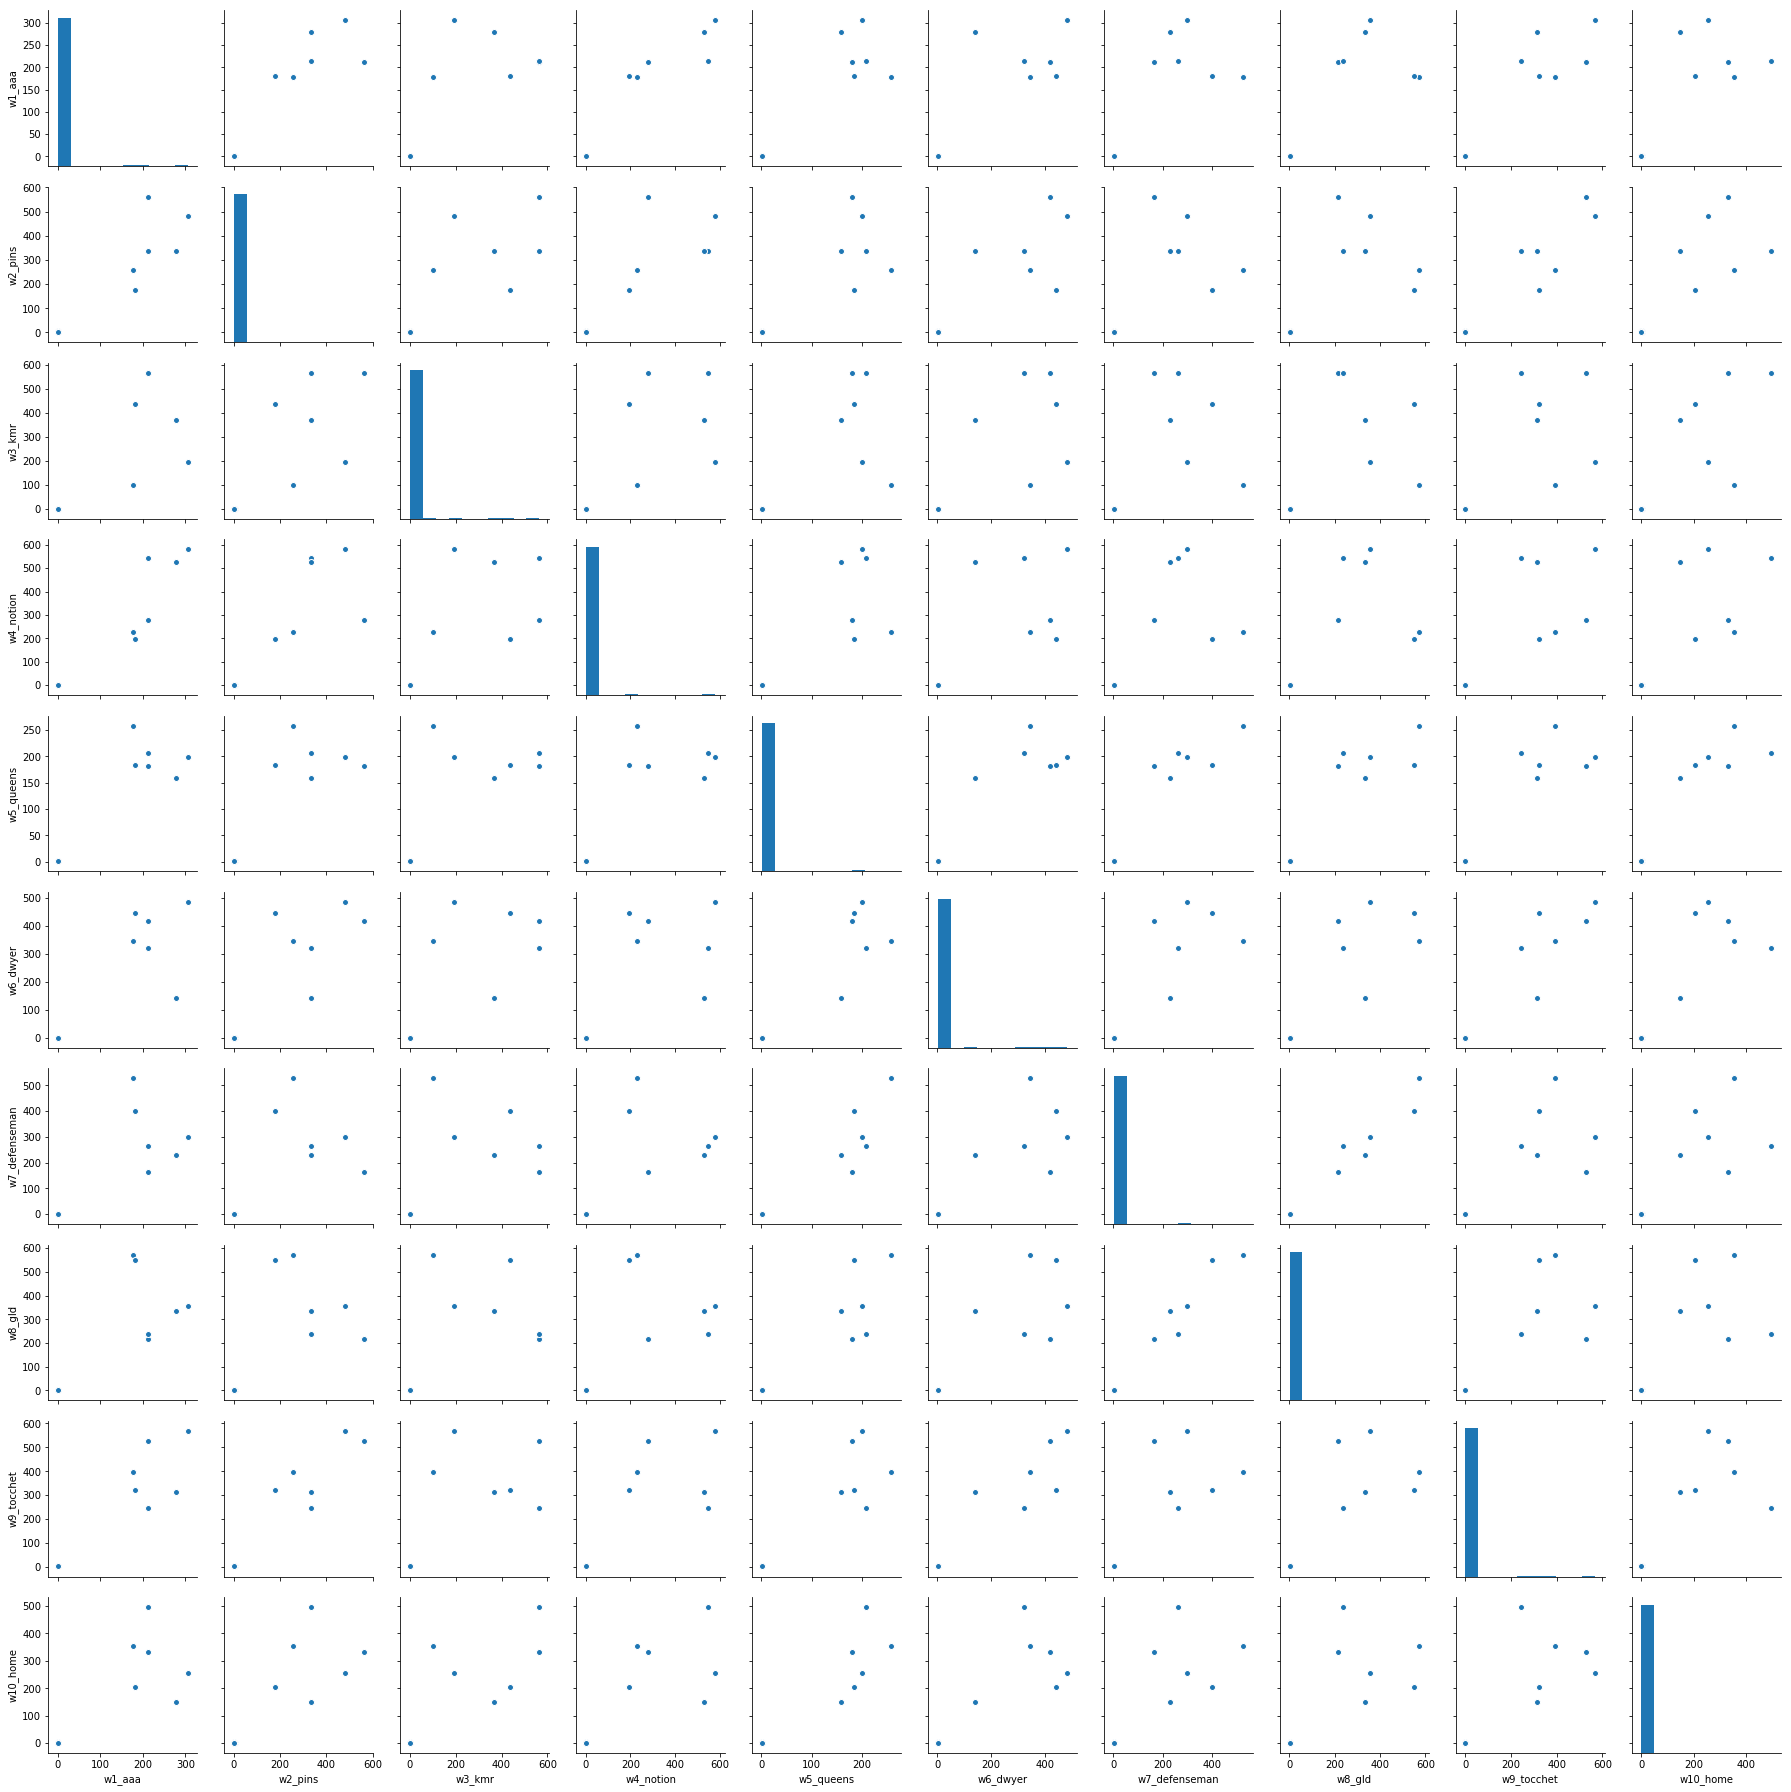

In [33]:
#Given the class is 2, plot pairplots of the first 10 attributes against each other to start investigating
#whether there is any correlation between any of them, which would be a problem in the Naive Bayes model
class2A = trainA[trainA["class"]==2]
sns.pairplot(class2A[columnLabels[0:10]])
plt.show()

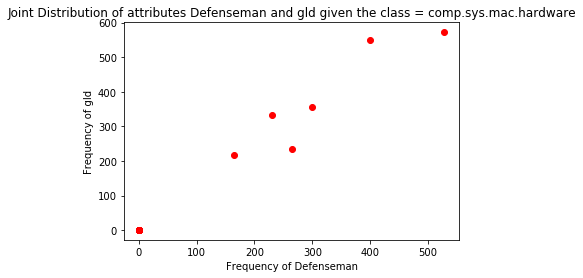

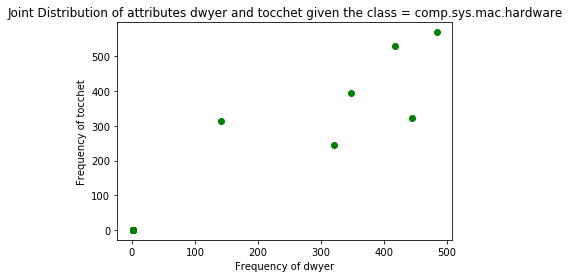

In [34]:
#Creating separating scatter plots of a couple of pairplots I identified as having positive correlations, 
#so that I can observe the plots better at a larger size.

plt.scatter(class2A["w7_defenseman"], class2A["w8_gld"], color="r")
plt.xlabel("Frequency of Defenseman")
plt.ylabel("Frequency of gld")
plt.title("Joint Distribution of attributes Defenseman and gld given the class = comp.sys.mac.hardware")
plt.show()

plt.scatter(class2A["w6_dwyer"], class2A["w9_tocchet"], color="g")
plt.xlabel("Frequency of dwyer")
plt.ylabel("Frequency of tocchet")
plt.title("Joint Distribution of attributes dwyer and tocchet given the class = comp.sys.mac.hardware")
plt.show()

The Gaussian Naive Bayes classifier assumes that all attributes are independent given the class. This means that should we visualise the joint distribution via a scatter plot (given the class of both attributes are identical), we should see no correlation. However, as we can see above, there IS covariance and correlation between certain attributes given a class. This means that our assumption of independence given the class is incorrect in this example, and is a possible answer as to why the Naive Bayes Classifier did not perform so well on this particular problem. 
